# Code alongs - random forest

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

df = pd.read_csv("../data/Heart.csv", index_col=0)
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


In [4]:
df.isna()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False
302,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isna()["Ca"]

1      False
2      False
3      False
4      False
5      False
       ...  
299    False
300    False
301    False
302    False
303     True
Name: Ca, Length: 303, dtype: bool

In [6]:
df[df.isna()["Ca"]]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [8]:
df["Ca"].value_counts()

Ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64

In [9]:
df[df.isna()["Thal"]]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes


In [10]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


<Axes: xlabel='AHD', ylabel='count'>

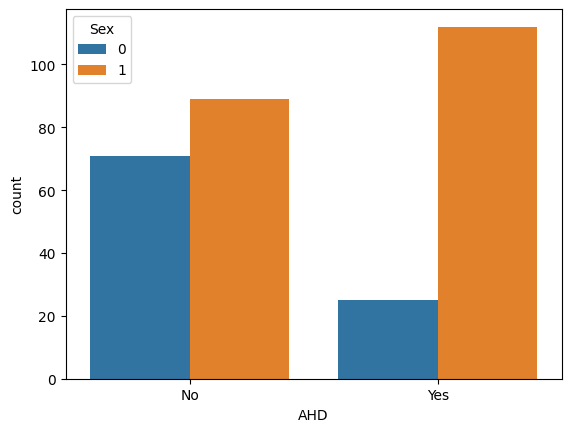

In [15]:
sns.countplot(data=df, x="AHD", hue="Sex")

<Axes: xlabel='Age', ylabel='Count'>

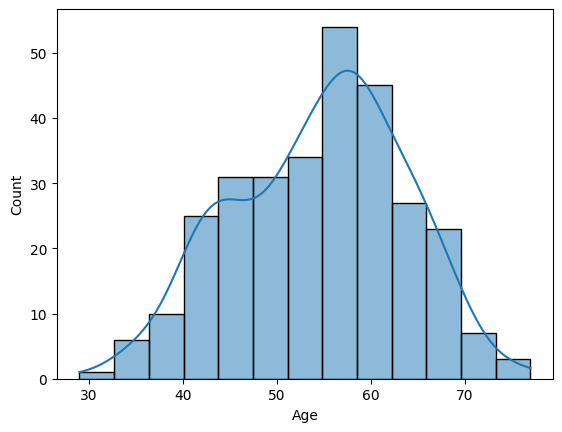

In [17]:
sns.histplot(data=df, x="Age", kde=True)

In [18]:
df.query("AHD == 'Yes'")

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
7,62,0,asymptomatic,140,268,0,2,160,0,3.6,3,2.0,normal,Yes
9,63,1,asymptomatic,130,254,0,2,147,0,1.4,2,1.0,reversable,Yes
10,53,1,asymptomatic,140,203,1,2,155,1,3.1,3,0.0,reversable,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,asymptomatic,140,241,0,0,123,1,0.2,2,0.0,reversable,Yes
299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes


<Axes: xlabel='Age', ylabel='Count'>

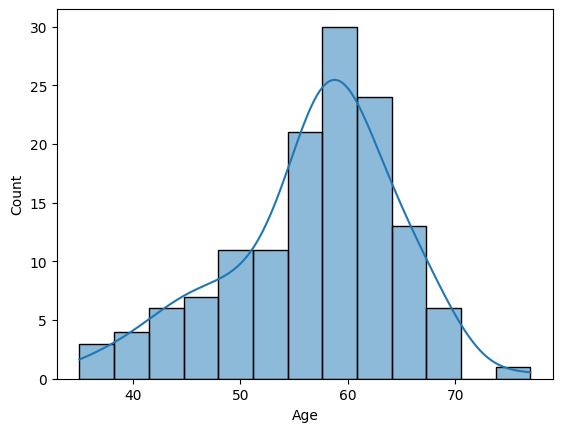

In [20]:
sns.histplot(data=df.query("AHD == 'Yes'"), x="Age", kde=True)

In [21]:
df.columns

Index(['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR',
       'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

<Axes: xlabel='Chol', ylabel='Count'>

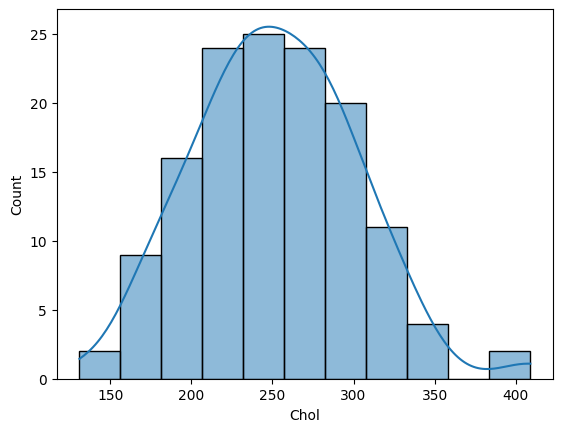

In [22]:
sns.histplot(data=df.query("AHD == 'Yes'"), x="Chol", kde=True)

<Axes: xlabel='Chol', ylabel='Count'>

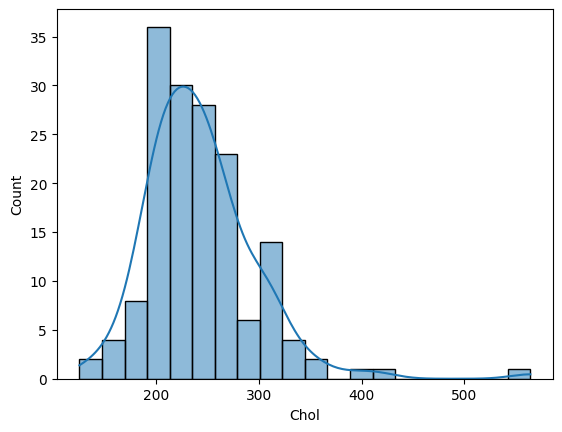

In [23]:
sns.histplot(data=df.query("AHD == 'No'"), x="Chol", kde=True)

In [24]:
df["ChestPain"].value_counts()

ChestPain
asymptomatic    142
nonanginal       83
nontypical       49
typical          23
Name: count, dtype: int64

<Axes: xlabel='ChestPain'>

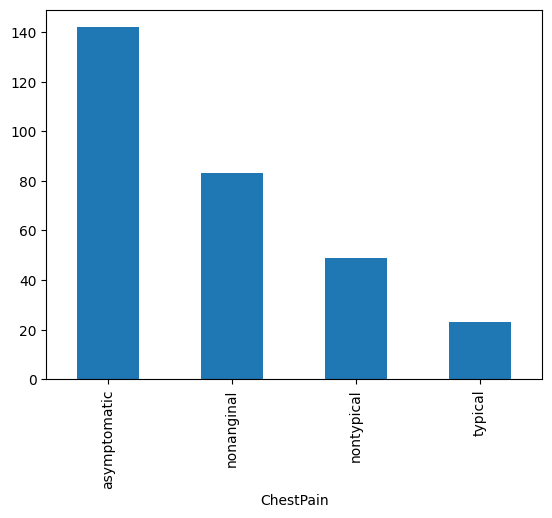

In [26]:
df["ChestPain"].value_counts().plot(kind="bar")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 1 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        297 non-null    int64  
 1   Sex        297 non-null    int64  
 2   ChestPain  297 non-null    object 
 3   RestBP     297 non-null    int64  
 4   Chol       297 non-null    int64  
 5   Fbs        297 non-null    int64  
 6   RestECG    297 non-null    int64  
 7   MaxHR      297 non-null    int64  
 8   ExAng      297 non-null    int64  
 9   Oldpeak    297 non-null    float64
 10  Slope      297 non-null    int64  
 11  Ca         297 non-null    float64
 12  Thal       297 non-null    object 
 13  AHD        297 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 34.8+ KB


<Axes: xlabel='MaxHR', ylabel='Count'>

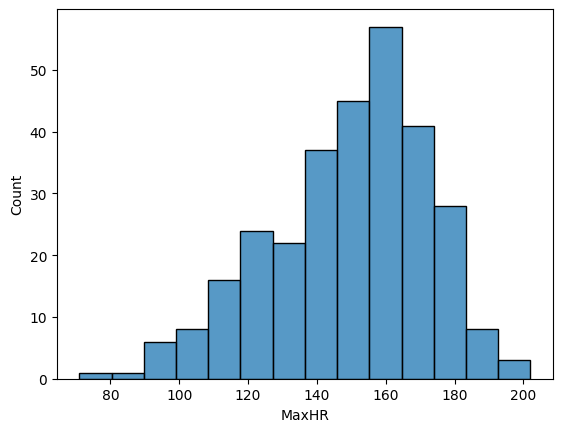

In [32]:
sns.histplot(data=df, x="MaxHR")

## Dummies

In [34]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_normal,Thal_reversable,AHD_Yes
1,63,1,145,233,1,2,150,0,2.3,3,0.0,False,False,True,False,False,False
2,67,1,160,286,0,2,108,1,1.5,2,3.0,False,False,False,True,False,True
3,67,1,120,229,0,2,129,1,2.6,2,2.0,False,False,False,False,True,True
4,37,1,130,250,0,0,187,0,3.5,3,0.0,True,False,False,True,False,False
5,41,0,130,204,0,2,172,0,1.4,1,0.0,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,0,123,1,0.2,2,0.0,False,False,False,False,True,True
299,45,1,110,264,0,0,132,0,1.2,2,0.0,False,False,True,False,True,True
300,68,1,144,193,1,0,141,0,3.4,2,2.0,False,False,False,False,True,True
301,57,1,130,131,0,0,115,1,1.2,2,1.0,False,False,False,False,True,True


## Train|test split

In [39]:
from sklearn.model_selection import train_test_split

X, y = df_dummies.drop("AHD_Yes", axis=1), df_dummies["AHD_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



## Random forest model

In [40]:
from sklearn.ensemble import RandomForestClassifier

# note: random forest and decision trees don't need scaling
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred




array([False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True,  True,  True, False,  True, False,  True,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
        True, False, False, False,  True,  True, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False, False, False, False, False, False,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True, False, False, False,  True, False, False, False])

## Evaluation

              precision    recall  f1-score   support

       False       0.80      0.85      0.83        53
        True       0.81      0.76      0.79        46

    accuracy                           0.81        99
   macro avg       0.81      0.80      0.81        99
weighted avg       0.81      0.81      0.81        99



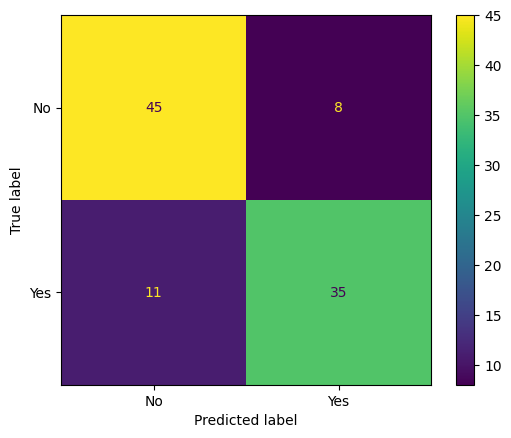

In [42]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def evaluate_classification(y_test, y_pred, labels = ["No", "Yes"]):
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=labels).plot()

evaluate_classification(y_test, y_pred)

In [43]:
# how important each feature is for the random forest model to predict our label
model.feature_importances_

array([0.09335241, 0.03404556, 0.07065496, 0.07776878, 0.00730199,
       0.02111083, 0.12397709, 0.04009451, 0.10000588, 0.02237369,
       0.17887526, 0.04346494, 0.00932203, 0.01581425, 0.09096156,
       0.07087628])

In [44]:
model.feature_importances_.sum()

1.0

<Axes: xlabel='Importance', ylabel='Feature'>

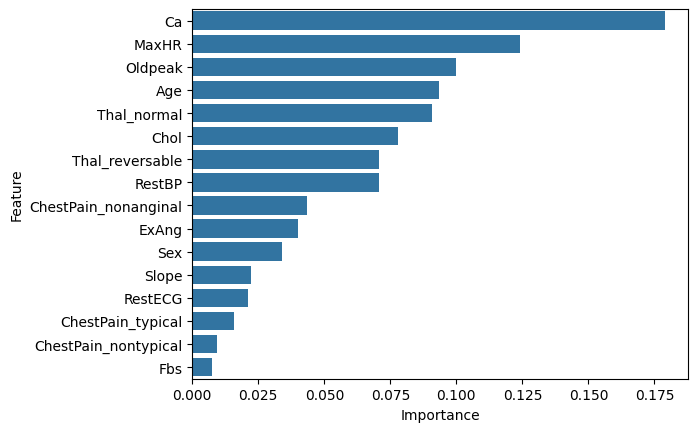

In [54]:
feature_importance = pd.DataFrame([X.columns, model.feature_importances_]).T
feature_importance.columns = ["Feature", "Importance"]
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
sns.barplot(data=feature_importance, x="Importance", y="Feature")